In [190]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creadit/creditcard.csv


In [191]:
!pip install scikit-learn
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [192]:
transactions = pd.read_csv('/kaggle/input/creadit/creditcard.csv')

In [193]:
transactions.shape

(284807, 31)

In [194]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [195]:
transactions.isnull().any().any()

False

In [196]:
transactions.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
144008,85793.0,0.342978,-1.464496,-0.896348,0.308894,-0.508904,-0.740347,0.954405,-0.333114,-0.373348,-0.129835,1.091603,0.516141,-0.378514,0.858782,0.194785,0.287349,-0.489004,0.069256,0.378344,0.926725,0.277495,-0.361212,-0.571737,0.092959,0.366808,1.022441,-0.214663,0.062851,503.98,0
41290,40625.0,-0.366461,0.909143,0.602281,0.104488,-0.274924,-0.660912,0.149001,0.495659,-0.269209,-0.560355,-0.782857,-0.941208,-2.031372,0.973832,1.097331,-0.016017,0.187763,-0.330961,-0.474072,-0.371000,0.143512,0.238157,0.009223,0.046245,-0.391674,0.328106,-0.108258,-0.039488,1.50,0
171977,120904.0,1.924802,-0.382782,-0.757639,0.196885,-0.285979,-0.445984,-0.182087,-0.049558,0.584241,0.126962,0.675239,1.191797,0.192394,0.210120,-0.630512,0.399782,-0.680145,-0.377278,0.646463,-0.093267,-0.448299,-1.302343,0.439958,-0.365895,-0.662089,0.048559,-0.066629,-0.054227,46.90,0
205754,135902.0,-0.939697,0.923391,0.012419,0.021299,0.542309,-0.836553,0.289790,0.488827,-0.470991,-1.425615,0.761830,-0.003098,-1.359999,-1.001430,-1.074550,0.165159,1.448389,0.954812,0.506975,-0.105510,0.148850,0.354280,-0.369917,-0.067863,0.115759,0.713374,-0.041201,0.022094,1.00,0
79305,57961.0,0.976827,-0.184264,1.755405,3.096480,-1.078507,0.853152,-0.856250,0.501475,0.970373,0.258284,-1.331867,-0.211491,-2.107708,-0.541930,-1.820281,-0.514581,0.769463,-1.079898,-0.667583,-0.315537,-0.269380,-0.456356,0.112148,0.371224,0.227028,-0.046012,0.061850,0.032050,22.63,0


In [197]:

transactions['Class'].value_counts()


Class
0    284315
1       492
Name: count, dtype: int64

In [198]:
transactions['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [199]:
X = transactions.drop(labels='Class', axis=1) 
y = transactions.loc[:,'Class']               
del transactions                            

In [200]:
from sklearn.model_selection import train_test_split

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
del X, y


In [202]:
X_train.shape

(227845, 30)

In [203]:
X_test.shape

(56962, 30)

In [204]:

X_train.is_copy = False
X_test.is_copy = False

In [205]:
X_train['Time'].describe()

count    227845.000000
mean      94707.617670
std       47523.204111
min           0.000000
25%       54086.000000
50%       84609.000000
75%      139261.000000
max      172792.000000
Name: Time, dtype: float64

In [206]:
X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600

In [207]:
X_train['Time'].max() / 24

1.9999074074074075

<ipython-input-208-d73efd30594f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Time'], bins=48, kde=False)


Text(0.5, 1.0, 'Transaction Times')

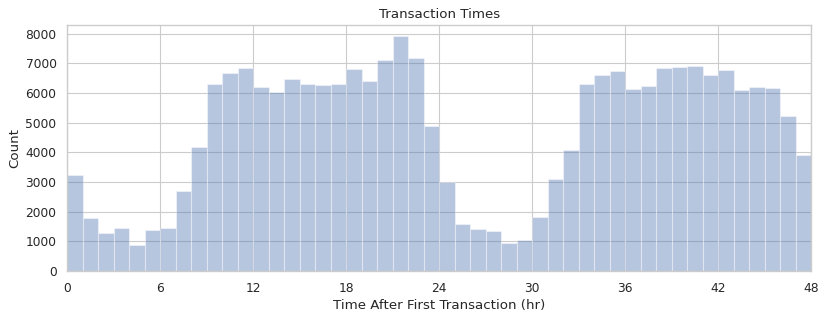

In [208]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Time'], bins=48, kde=False)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')

In [209]:
X_train['Amount'].describe()

count    227845.000000
mean         88.709296
std         250.026305
min           0.000000
25%           5.550000
50%          22.000000
75%          77.890000
max       25691.160000
Name: Amount, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


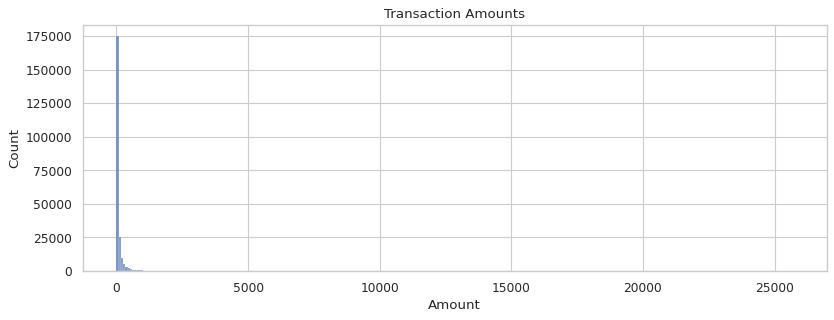

In [210]:
plt.figure(figsize=(12, 4), dpi=80)
sns.histplot(X_train['Amount'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('Transaction Amounts')
plt.show()


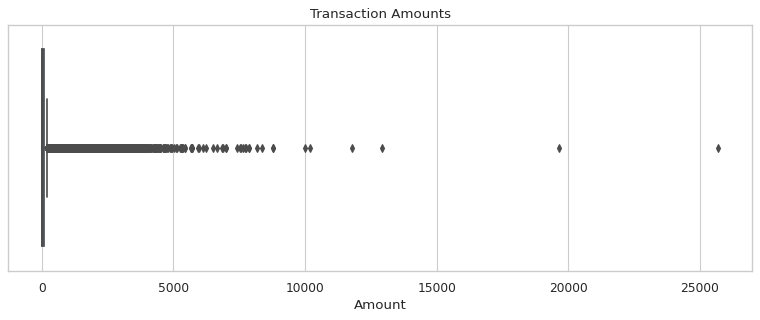

In [211]:
plt.figure(figsize=(12, 4), dpi=80)
sns.boxplot(data=X_train, x='Amount')
plt.title('Transaction Amounts')
plt.show()


In [212]:
X_train['Amount'].skew()

16.91030354651674

In [213]:
X_train.loc[:,'Amount'] = X_train['Amount'] + 1e-9

In [214]:
X_train.loc[:,'Amount'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(X_train['Amount'], alpha=0.01)

In [215]:
maxlog

0.13436570313336865

In [216]:
(min_ci, max_ci)

(0.13291390124733235, 0.13582665450851425)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


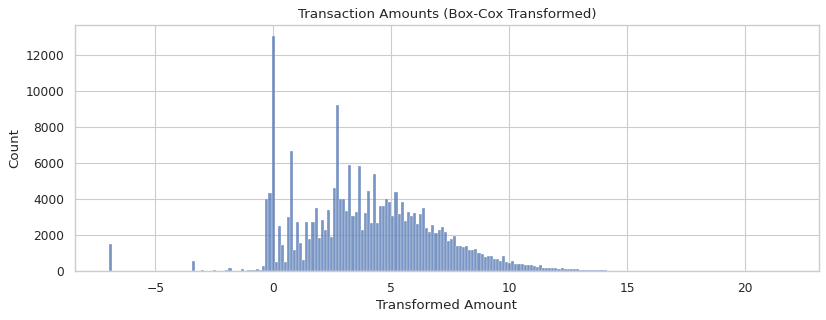

In [217]:
plt.figure(figsize=(12, 4), dpi=80)
sns.histplot(X_train['Amount'], kde=False)
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')
plt.show()


In [218]:
X_train['Amount'].describe()

count    227845.000000
mean          3.985515
std           2.972505
min          -6.982733
25%           1.927181
50%           3.831861
75%           5.919328
max          21.680568
Name: Amount, dtype: float64

In [219]:
X_train['Amount'].skew()

0.11421493415882948

In [220]:
X_test.loc[:,'Amount'] = X_test['Amount'] + 1e-9

In [221]:
X_test.loc[:,'Amount'] = sp.stats.boxcox(X_test['Amount'], lmbda=maxlog)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


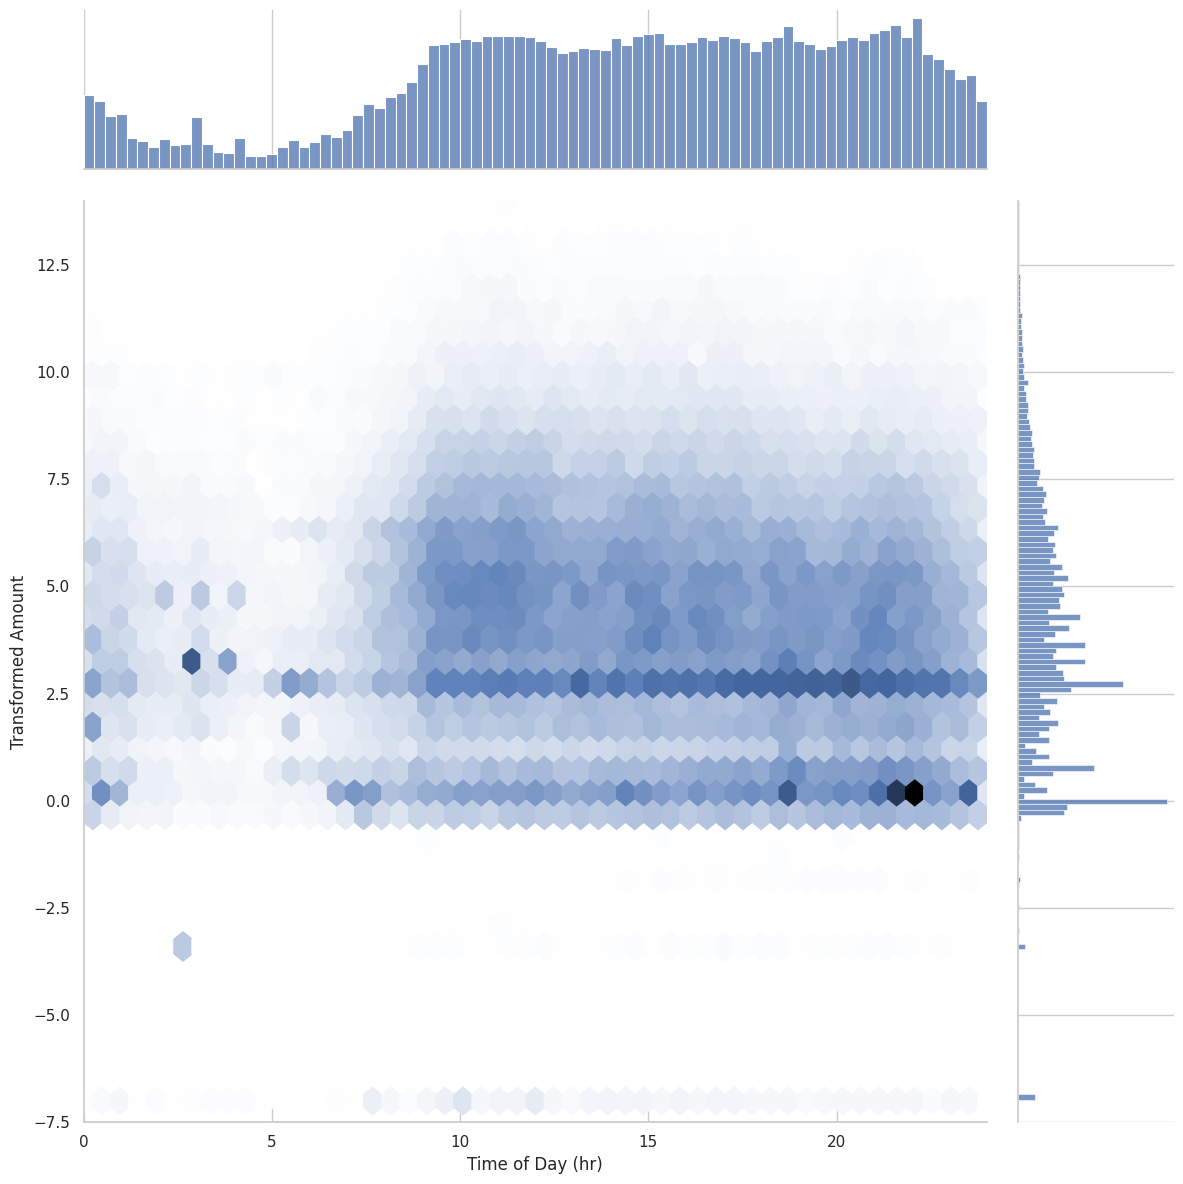

In [222]:
sns.jointplot(
    x=X_train['Time'].apply(lambda x: x % 24), 
    y=X_train['Amount'], 
    kind='hex', 
    height=12,  # Replaces `size`
    xlim=(0, 24), 
    ylim=(-7.5, 14)
).set_axis_labels('Time of Day (hr)', 'Transformed Amount')


In [223]:
pca_vars = ['V%i' % k for k in range(1,29)]

In [224]:
X_train[pca_vars].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,-0.000713,-0.001034,0.002557,0.003839,-0.002857,0.002085,0.000022,0.000093,0.000243,-0.000363,0.000651,-0.000834,-0.000976,0.002291,-0.000595,-0.000499,0.000587,0.001448,-0.000146,-0.000796,0.000023,0.000897,0.000765,-0.000380,0.000136,-0.000301,-0.000046,-0.000027
std,1.952399,1.636689,1.514288,1.417086,1.383532,1.333769,1.240239,1.200348,1.096453,1.082580,1.020932,1.000266,0.996678,0.957485,0.916946,0.876978,0.846748,0.838169,0.815140,0.767956,0.733325,0.725353,0.616772,0.605741,0.522184,0.482187,0.405182,0.331048
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.431131,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.335193,-7.213527,-54.497720,-34.830382,-10.933144,-36.666000,-2.836627,-8.696627,-2.534330,-22.565679,-15.430084
25%,-0.922830,-0.599928,-0.887861,-0.844052,-0.693702,-0.766195,-0.555377,-0.208302,-0.642006,-0.535079,-0.761255,-0.406597,-0.650225,-0.423563,-0.584357,-0.469513,-0.484153,-0.497660,-0.456946,-0.212129,-0.227952,-0.541079,-0.162242,-0.354208,-0.317488,-0.327576,-0.070767,-0.053013
50%,0.016743,0.064370,0.180865,-0.016750,-0.055388,-0.271706,0.039185,0.022594,-0.051224,-0.091877,-0.032213,0.141227,-0.014920,0.051939,0.047181,0.066080,-0.065260,-0.001867,0.004371,-0.062809,-0.029095,0.007661,-0.011184,0.040977,0.017081,-0.052599,0.001373,0.011255
75%,1.315147,0.801738,1.027592,0.746907,0.611056,0.401204,0.569307,0.328079,0.596563,0.455577,0.740921,0.617925,0.663521,0.495181,0.649788,0.522836,0.400067,0.501554,0.459695,0.132873,0.186678,0.529342,0.147825,0.438432,0.351400,0.240554,0.091028,0.078341
max,2.451888,22.057729,9.382558,16.715537,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.207059,5.041069,5.591971,39.420904,27.202839,10.503090,22.083545,4.584549,7.519589,3.517346,31.612198,33.847808


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


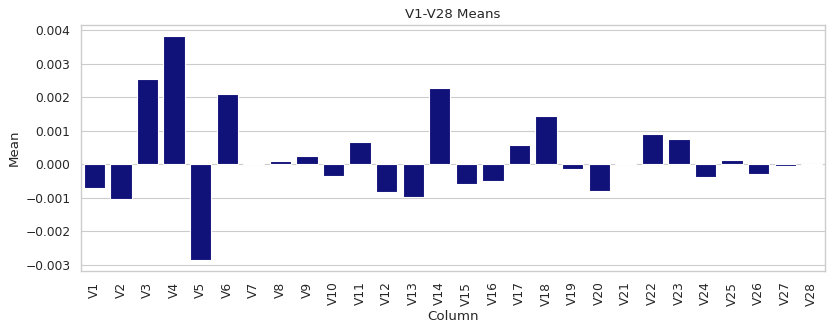

In [225]:
plt.figure(figsize=(12, 4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].mean(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many columns
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


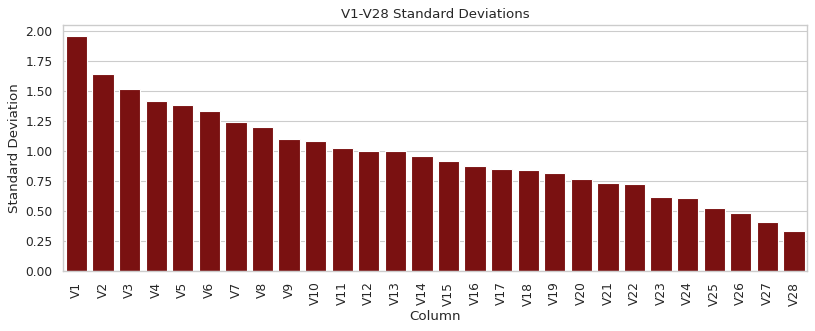

In [226]:
plt.figure(figsize=(12, 4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].std(), color='darkred')
plt.xlabel('Column')
plt.ylabel('Standard Deviation')
plt.title('V1-V28 Standard Deviations')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


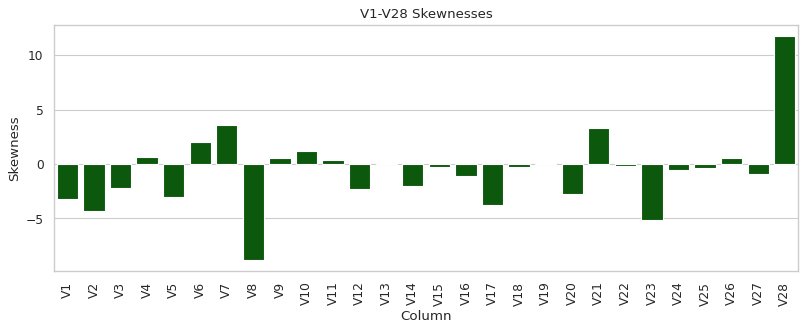

In [227]:
plt.figure(figsize=(12, 4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


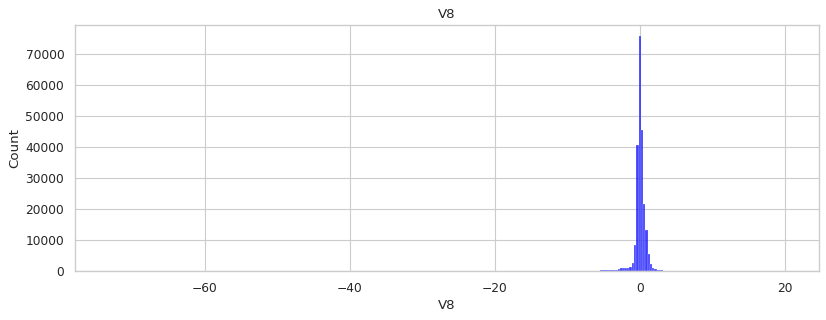

In [228]:
plt.figure(figsize=(12, 4), dpi=80)
sns.histplot(X_train['V8'], bins=300, kde=False, color='blue')
plt.ylabel('Count')
plt.title('V8')
plt.show()



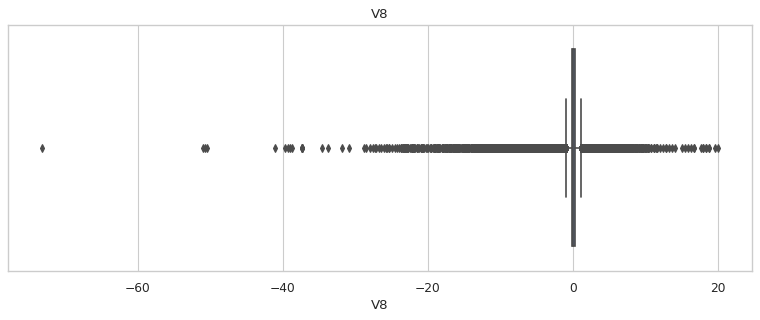

In [229]:
plt.figure(figsize=(12, 4), dpi=80)
sns.boxplot(x=X_train['V8']) 
plt.title('V8')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


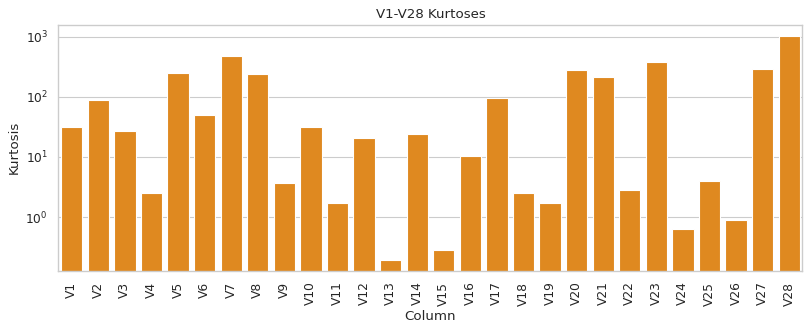

In [230]:
plt.figure(figsize=(12, 4), dpi=80)
plt.yscale('log')  
sns.barplot(x=pca_vars, y=X_train[pca_vars].kurtosis(), color='darkorange')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtoses')
plt.xticks(rotation=90) 
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


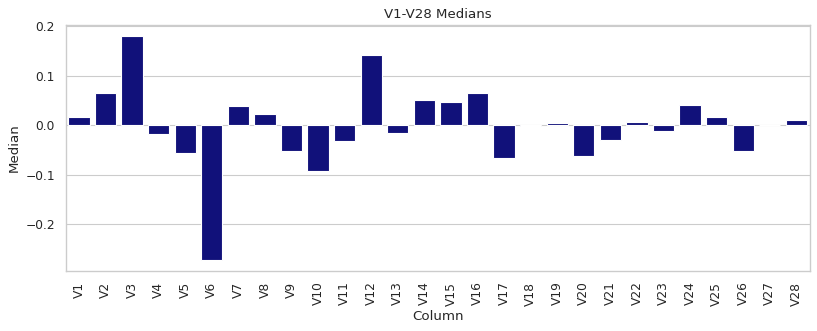

In [231]:
plt.figure(figsize=(12, 4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].median(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Median')
plt.title('V1-V28 Medians')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


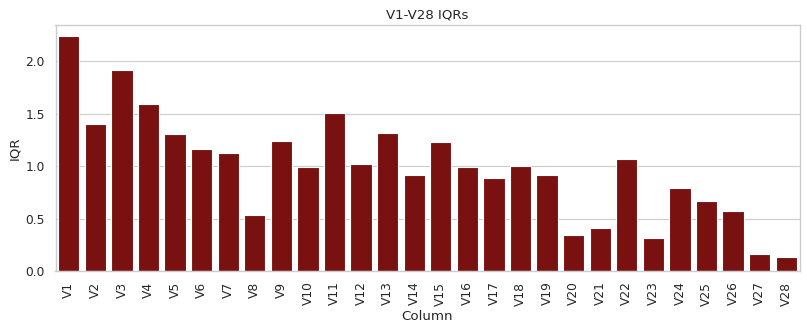

In [232]:
plt.figure(figsize=(12, 4), dpi=80)
iqr_values = X_train[pca_vars].quantile(0.75) - X_train[pca_vars].quantile(0.25)
sns.barplot(x=pca_vars, y=iqr_values, color='darkred')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQRs')
plt.xticks(rotation=90) 
plt.show()


In [233]:
from sklearn.feature_selection import mutual_info_classif

In [234]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

mutual_infos = pd.Series(data=mutual_info_classif(X_train, y_train, discrete_features=False, random_state=1), index=X_train.columns)
print(mutual_infos)


Time      0.001722
V1        0.001990
V2        0.003085
V3        0.004755
V4        0.004843
V5        0.002254
V6        0.002265
V7        0.003941
V8        0.001843
V9        0.003996
V10       0.007354
V11       0.006607
V12       0.007354
V13       0.000205
V14       0.007977
V15       0.000230
V16       0.005793
V17       0.008037
V18       0.004025
V19       0.001322
V20       0.001136
V21       0.002304
V22       0.000388
V23       0.000827
V24       0.000593
V25       0.000376
V26       0.000459
V27       0.002271
V28       0.001757
Amount    0.001411
dtype: float64


In [235]:
mutual_infos.sort_values(ascending=False)

V17       0.008037
V14       0.007977
V10       0.007354
V12       0.007354
V11       0.006607
V16       0.005793
V4        0.004843
V3        0.004755
V18       0.004025
V9        0.003996
V7        0.003941
V2        0.003085
V21       0.002304
V27       0.002271
V6        0.002265
V5        0.002254
V1        0.001990
V8        0.001843
V28       0.001757
Time      0.001722
Amount    0.001411
V19       0.001322
V20       0.001136
V23       0.000827
V24       0.000593
V26       0.000459
V22       0.000388
V25       0.000376
V15       0.000230
V13       0.000205
dtype: float64

In [236]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [237]:
pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

In [238]:
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

In [239]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

In [240]:
MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [241]:
import warnings
with warnings.catch_warnings(): 
    warnings.simplefilter("ignore")
    grid_sgd.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [242]:
grid_sgd.best_score_

0.8054381462050987

In [244]:
grid_sgd.best_params_

{'model__alpha': 233.57214690901213,
 'model__class_weight': 'balanced',
 'model__loss': 'hinge'}

In [243]:
from sklearn.ensemble import RandomForestClassifier

In [247]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

In [248]:
param_grid_rf = {'model__n_estimators': [75]}

In [249]:
grid_rf = GridSearchCV(estimator=pipeline_rf, 
                       param_grid=param_grid_rf, 
                       scoring=MCC_scorer, 
                       n_jobs=-1, 
                       pre_dispatch='2*n_jobs', 
                       cv=5, 
                       verbose=1, 
                       return_train_score=False)


In [250]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=1))]),
             n_jobs=-1, param_grid={'model__n_estimators': [75]},
             scoring=make_scorer(matthews_corrcoef), verbose=1)

In [252]:
grid_rf.best_score_

0.8596447282953857

In [253]:
grid_rf.best_params_

{'model__n_estimators': 75}

In [256]:
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [257]:
def classification_eval(estimator, X_test, y_test):
   
    y_pred = estimator.predict(X_test)
    
    
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    
    print('CONFUSION MATRIX')
    print(confusion_matrix(y_test, y_pred), '\n')
    
    print('CLASSIFICATION REPORT')
    print(classification_report(y_test, y_pred, digits=dec))
    
    print('SCALAR METRICS')
    format_str = '%%13s = %%.%if' % dec
    print(format_str % ('MCC', matthews_corrcoef(y_test, y_pred)))
    if y_test.nunique() <= 2:
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('AUPRC', average_precision_score(y_test, y_score)))
        print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))
    print(format_str % ("Cohen's kappa", cohen_kappa_score(y_test, y_pred)))
    print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))

In [258]:
classification_eval(grid_rf, X_test, y_test)

CONFUSION MATRIX
[[56854    10]
 [   15    83]] 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99974   0.99982   0.99978     56864
           1    0.89247   0.84694   0.86911        98

    accuracy                        0.99956     56962
   macro avg    0.94610   0.92338   0.93445     56962
weighted avg    0.99955   0.99956   0.99956     56962

SCALAR METRICS
          MCC = 0.86919
        AUPRC = 0.85098
        AUROC = 0.95924
Cohen's kappa = 0.86889
     Accuracy = 0.99956
